In [2]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
)

# wine = load_wine()

# load the wine dataset

wine_data_red = pd.read_csv("winequality-red.csv", delimiter=";")
wine_data_white = pd.read_csv("winequality-red.csv", delimiter=";")

# combine the datasets into 1
wine_data_all = pd.concat([wine_data_red, wine_data_white], ignore_index=True)


# print("WINE DATA", wine_data)

# wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)

# wine_df['target'] = wine.target

# print(wine_df.head())

#  investigate the data
print(wine_data_all.head())
print(wine_data_all.shape)
print(wine_data_all.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [6]:
# Debugging pandas issues
print(pd.__file__)

c:\Users\Riyad\miniconda3\envs\ece457b\lib\site-packages\pandas\__init__.py


In [7]:
# Look at statistics of data
wine_data_all.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,3198.0,8.319637,1.740824,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,3198.0,0.527821,0.179032,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,3198.0,0.270976,0.194771,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,3198.0,2.538806,1.409708,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,3198.0,0.087467,0.047058,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,3198.0,15.874922,10.458521,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,3198.0,46.467792,32.890179,6.00000,22.0000,38.00000,62.000000,289.00000
density,3198.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997837,1.00369
pH,3198.0,3.311113,0.154362,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,3198.0,0.658149,0.169480,0.33000,0.5500,0.62000,0.730000,2.00000


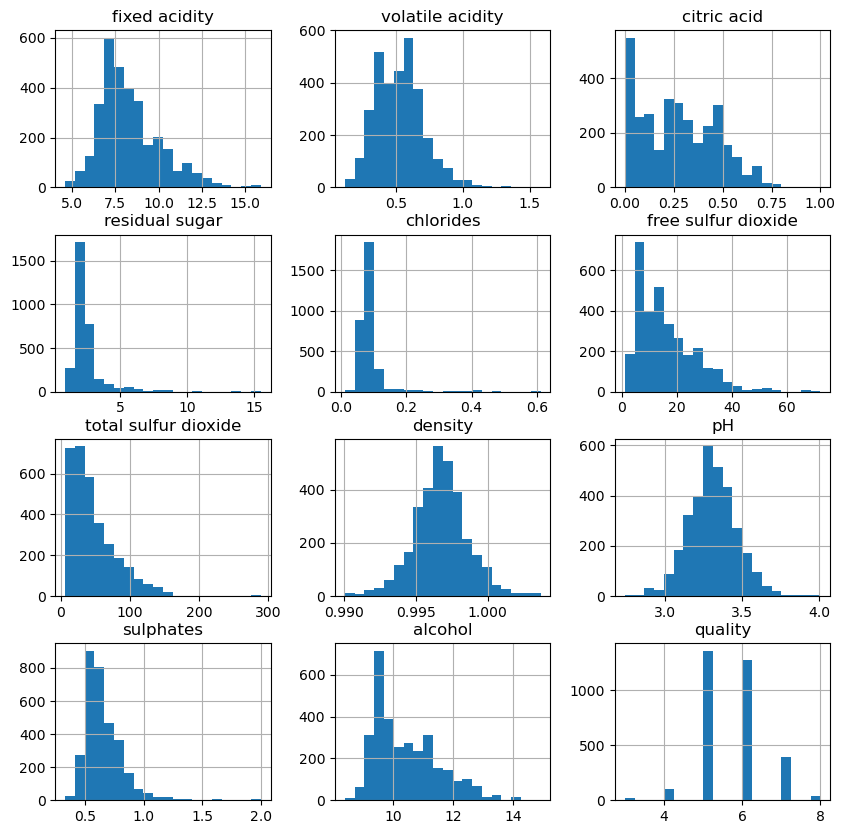

In [8]:
# check the distribution of the data
wine_data_all.hist(bins=20, figsize=(10, 10))
plt.show()

In [9]:
# Count the number of occurrences of each quality rating
quality_counts = wine_data_all["quality"].value_counts()
print(quality_counts)

5    1362
6    1276
7     398
4     106
8      36
3      20
Name: quality, dtype: int64


In [4]:
# print(wine_data_all.columns)

# Split the dataset into input features and targets
# Since the data is clustered around 5 and 6 we change the classes to be greater than 5 or not
# wine_data_all['best quality'] = [1 if x > 5 else 0 for x in wine_data_all.quality]
# input = wine_data_all.drop(['quality', 'best quality'], axis=1)
# target = wine_data_all['best quality']
input = wine_data_all.drop(["quality"], axis=1)
target = wine_data_all["quality"]

# split data into training and testing
input_train, input_test, target_train, target_test = train_test_split(
    input, target, test_size=0.2, random_state=42
)

# Normalize the input features
scaler = StandardScaler()
input_train = scaler.fit_transform(input_train)
input_test = scaler.transform(input_test)

# norm = MinMaxScaler()
# input = norm.fit_transform(input)
# xtest = norm.transform(xtest)

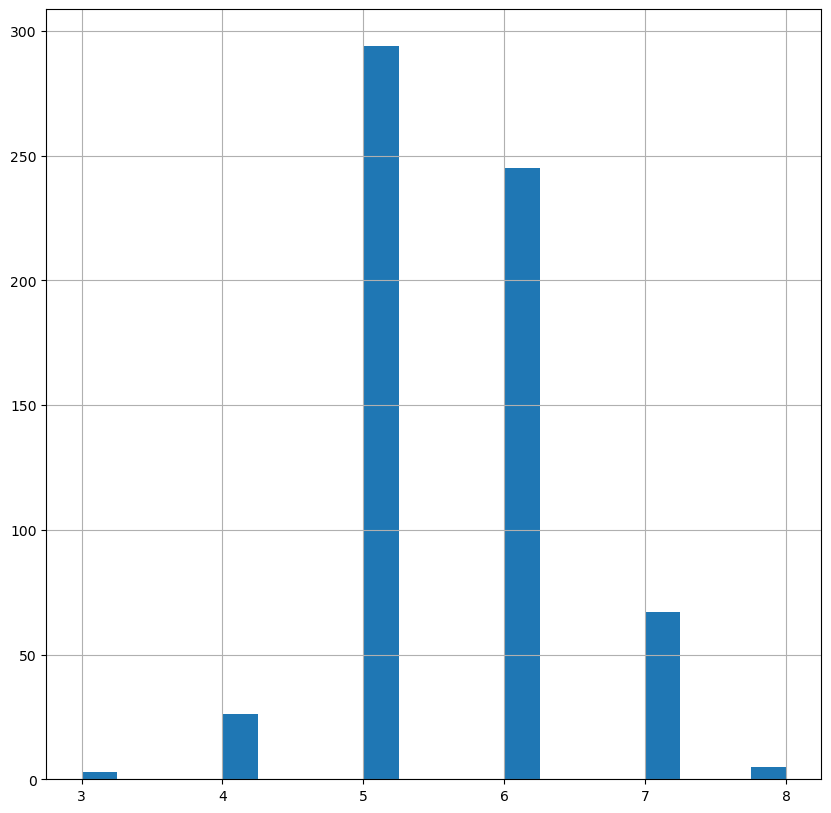

In [12]:
# check the distribution of the data
target_test.hist(bins=20, figsize=(10, 10))
plt.show()

In [13]:
# example classifier
clf = SVC(kernel='linear', C=1)

# Evaluate the performance of the classifier using cross-validation
scores = cross_val_score(clf, input_train, target_train, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.58 (+/- 0.08)


In [14]:
# Define the SVM classifiers with different hyperparameters

rbf_and_poly_parameters = [1, 10, 50, 100]
linear_parameters = [1, 10, 20, 30]

rbf_clf_array = []
poly_clf_array = []
linear_clf_array = []

for parameter in rbf_and_poly_parameters:
    rbf_clf_array.append(SVC(kernel="rbf", C=parameter))
    poly_clf_array.append(SVC(kernel="poly", C=parameter))


for linear_parameter in linear_parameters:
    linear_clf_array.append(SVC(kernel="linear", C=linear_parameter))

# Evaluate the performance of each classifier using cross-validation
rbf_scores = [
    cross_val_score(clf, input_train, target_train, cv=10).mean()
    for clf in rbf_clf_array
]
poly_scores = [
    cross_val_score(clf, input_train, target_train, cv=10).mean()
    for clf in poly_clf_array
]
linear_scores = [
    cross_val_score(clf, input_train, target_train, cv=10).mean()
    for clf in linear_clf_array
]

In [15]:
print("RBF", rbf_scores)
print("Linear", linear_scores)
print("Poly scores", poly_scores)

[0.6489782475490197, 0.7302803308823529, 0.7900796568627451, 0.8135370710784313]
[0.584860600490196, 0.5832935049019607, 0.5840762867647058, 0.5840762867647058]
Poly scores [0.6575474877450981, 0.6860937500000001, 0.7216697303921569, 0.7392616421568627]


In [16]:
# best_model  = SVC(kernel='rbf', C=1)

# c_parameters = [0.1, 1]
# gamma = ['auto', 1, 2]
# c_parameters = [1]
# gamma = ['auto']
# c_parameters = [0.85]
# gamma = [0.2]
c_parameters = [0.85]
gamma = [0.19]
models = []
# c, g parameters
parameters = [
    [1, 1],
    [10, 10],
    [0.1, 0.1],
    [100, 100],
    [100, 5],
    [1, 100],
    [50, 50],
    [50, 100],
    [0.5, 0.5],
    [0.85, 0.19],
]

for para in parameters:
    model = SVC(kernel="rbf", C=para[0], gamma=para[1])
    models.append(model)

models = [
    cross_validate(clf, input_train, target_train, cv=10, return_estimator=True)
    for clf in models
]

for index, model in enumerate(models):
    best_model_index = models[index]["test_score"].argmax()
    best_model = models[index]["estimator"][best_model_index]
    print("Accuracy : ", model["test_score"][best_model_index])

# Get the best model (based on mean test score)
best_model_index = models[0]["test_score"].argmax()
best_model = models[0]["estimator"][best_model_index]

# Save the best model to a variable
best_model_variable = best_model

# print("Model scores", models)

Accuracy :  0.8671875
Accuracy :  0.9140625
Accuracy :  0.6627450980392157
Accuracy :  0.9140625
Accuracy :  0.92578125
Accuracy :  0.9140625
Accuracy :  0.9140625
Accuracy :  0.9140625
Accuracy :  0.7764705882352941
Accuracy :  0.7411764705882353


In [17]:
# print("Model scores", model_scores)

preediction [5 5 6 5 5 5 6 6 6 5 5 7 5 6 6 5 6 5 6 4 5 4 6 6 6 5 6 6 5 5 5 6 5 6 6 5 5
 3 6 5 7 5 5 7 6 6 5 5 5 5 6 5 5 6 6 5 7 7 5 7 5 6 6 6 7 5 6 6 5 6 6 5 6 6
 5 5 6 5 6 6 7 6 7 6 5 7 7 5 7 5 6 5 6 4 5 5 5 5 5 5 5 5 6 6 6 6 5 5 6 6 6
 6 5 6 5 7 5 6 6 5 6 6 5 5 5 5 5 5 5 5 5 5 5 5 7 6 5 6 7 6 5 6 5 5 7 6 6 5
 5 7 6 5 5 5 6 6 6 5 6 5 5 5 5 6 6 6 6 5 6 5 6 5 6 7 7 6 6 5 8 5 5 5 5 5 6
 5 5 5 5 7 5 5 6 5 5 6 8 6 5 6 5 5 8 5 6 5 5 5 5 5 5 5 6 5 6 5 5 6 5 6 5 6
 5 6 5 6 5 5 6 5 5 8 5 6 5 6 6 5 5 6 5 6 7 3 6 5 6 5 5 5 5 5 5 6 7 5 6 6 5
 5 5 5 6 4 5 6 5 6 6 5 7 6 6 6 7 7 5 5 5 6 6 5 5 5 7 5 5 6 7 6 5 5 7 6 5 5
 6 5 6 4 5 6 5 6 6 6 5 6 7 5 5 6 6 5 5 5 6 6 6 6 7 5 5 7 6 5 5 6 5 5 6 4 5
 5 6 5 7 7 5 7 7 6 7 5 5 5 5 5 6 5 6 5 5 6 6 6 6 7 5 5 6 5 5 6 5 5 5 6 5 5
 5 5 6 6 5 5 5 5 5 6 5 6 6 6 5 6 6 5 6 5 5 5 5 6 5 5 5 7 6 7 6 5 5 5 5 5 5
 5 5 6 5 5 6 7 5 6 5 6 6 5 6 5 5 5 5 5 6 5 5 5 5 5 5 6 7 7 6 5 6 6 5 5 4 5
 6 6 6 6 5 6 5 6 5 5 6 5 5 5 6 5 7 5 6 7 7 6 5 5 6 6 6 6 6 5 7 5 5 7 6 7 5
 6 5 5 6 5 5 

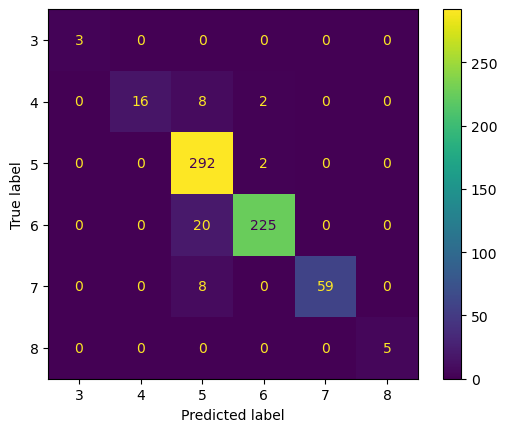

In [5]:
model_test = SVC(kernel="rbf", C=100, gamma=5)
model_test.fit(input_train, target_train)
best_prediction = model_test.predict(input_test)
best_acc = accuracy_score(target_test, best_prediction)
best_cm = confusion_matrix(target_test, best_prediction)

print("preediction", best_prediction)

print("Accuracy", best_acc)
print("Confusion Matrix", best_cm)

# output = model.predict_classes(test_x)
# class_names = [0, 1]
class_names = [3, 4, 5, 6, 7, 8]

disp1 = ConfusionMatrixDisplay(confusion_matrix=best_cm, display_labels=class_names)
disp1.plot()